In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [24]:
from keras.datasets import imdb
from keras.layers import Bidirectional, Embedding, Dense, Flatten, LSTM, SimpleRNN
from keras.models import Sequential
from keras import preprocessing
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
def adjust_axes(axis_obj, x_label_fontsize, y_label_fontsize, x_label_rotation=0, y_label_rotation=0):
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_label_fontsize)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_fontsize)
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_rotation(x_label_rotation)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_rotation(y_label_rotation)        

def plot_history(history_object):
    FONTSIZE = 23
    plt.close('all')
    fig = plt.figure(figsize=(18, 7.5))
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    epochs = range(1, len(history.history['loss']) + 1)

    # plot loss function
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax = plt.subplot(gs[0, 0])
    ax.plot(epochs, train_loss, marker='o', label='training loss')
    ax.plot(epochs, val_loss, marker='x', label='validation loss')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Loss fucntion', fontsize=FONTSIZE)


    # plot acuracy
    train_acuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']
    ax = plt.subplot(gs[0, 1])
    ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
    ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    ax.set_ylim(0, 1.0)    
    adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Binary accuracy', fontsize=FONTSIZE)

    plt.tight_layout(w_pad=3.0, h_pad=1)

### 1. LSTM RNN on chronologically-orderd training data

In [15]:
max_words = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_words)

max_sequence_length = 500
x_train = preprocessing.sequence.pad_sequences(input_train, maxlen=max_sequence_length)
x_test = preprocessing.sequence.pad_sequences(input_test, maxlen=max_sequence_length)

In [16]:
embedding_dimension = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=max_sequence_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 263s 13ms/step - loss: 0.4529 - binary_accuracy: 0.7919 - val_loss: 0.3442 - val_binary_accuracy: 0.8602
Epoch 2/10
20000/20000 [==============================] - 268s 13ms/step - loss: 0.2812 - binary_accuracy: 0.8921 - val_loss: 0.2964 - val_binary_accuracy: 0.8750
Epoch 3/10
20000/20000 [==============================] - 269s 13ms/step - loss: 0.2244 - binary_accuracy: 0.9144 - val_loss: 0.2953 - val_binary_accuracy: 0.8840
Epoch 4/10
20000/20000 [==============================] - 270s 13ms/step - loss: 0.1882 - binary_accuracy: 0.9294 - val_loss: 0.4031 - val_binary_accuracy: 0.8498
Epoch 5/10
20000/20000 [==============================] - 281s 14ms/step - loss: 0.1609 - binary_accuracy: 0.9433 - val_loss: 0.3096 - val_binary_accuracy: 0.8688
Epoch 6/10
20000/20000 [==============================] - 280s 14ms/step - loss: 0.1453 

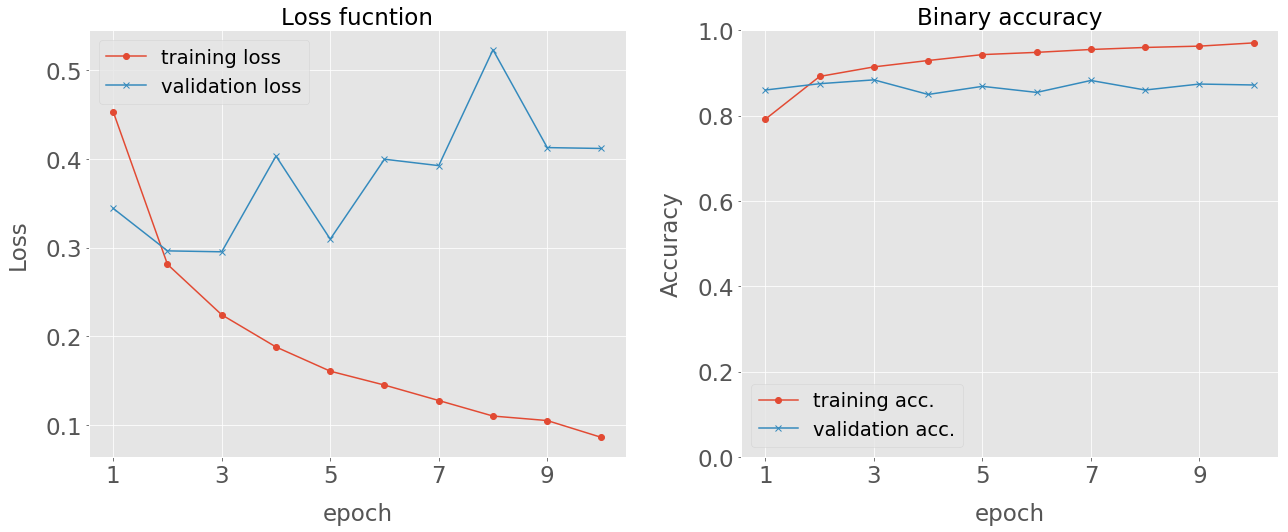

In [18]:
plot_history(history)

### 2. LSTM RNN on reverse-chronologically-orderd training data

In [19]:
max_words = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_words)

input_train = [x[::-1] for x in input_train]
input_test = [x[::-1] for x in input_test]

max_sequence_length = 500
x_train = preprocessing.sequence.pad_sequences(input_train, maxlen=max_sequence_length)
x_test = preprocessing.sequence.pad_sequences(input_test, maxlen=max_sequence_length)

In [20]:
embedding_dimension = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=max_sequence_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 274s 14ms/step - loss: 0.4840 - binary_accuracy: 0.7699 - val_loss: 0.4018 - val_binary_accuracy: 0.8496
Epoch 2/10
20000/20000 [==============================] - 272s 14ms/step - loss: 0.3153 - binary_accuracy: 0.8780 - val_loss: 0.4048 - val_binary_accuracy: 0.8192
Epoch 3/10
20000/20000 [==============================] - 271s 14ms/step - loss: 0.2606 - binary_accuracy: 0.9018 - val_loss: 0.3323 - val_binary_accuracy: 0.8608
Epoch 4/10
20000/20000 [==============================] - 272s 14ms/step - loss: 0.2218 - binary_accuracy: 0.9190 - val_loss: 0.3706 - val_binary_accuracy: 0.8712
Epoch 5/10
20000/20000 [==============================] - 282s 14ms/step - loss: 0.1955 - binary_accuracy: 0.9318 - val_loss: 0.3450 - val_binary_accuracy: 0.8828
Epoch 6/10
20000/20000 [==============================] - 279s 14ms/step - loss: 0.1778 - binary_accuracy: 0.9372 - val_loss: 0.3705 - v

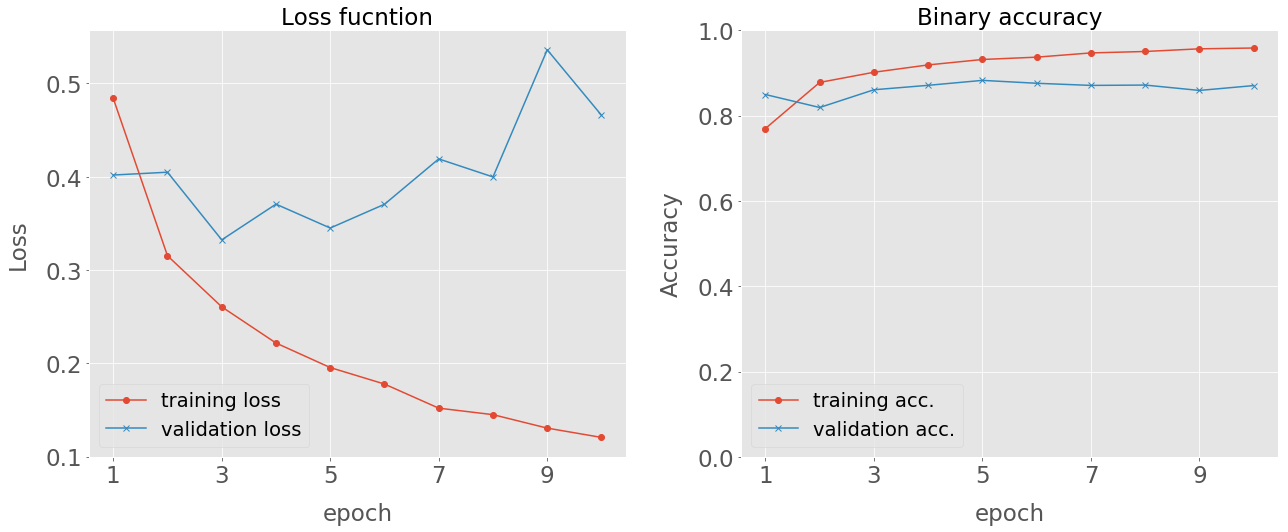

In [22]:
plot_history(history)

### 3. Bidirectional LSTM 

In [23]:
max_words = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_words)

max_sequence_length = 500
x_train = preprocessing.sequence.pad_sequences(input_train, maxlen=max_sequence_length)
x_test = preprocessing.sequence.pad_sequences(input_test, maxlen=max_sequence_length)

In [25]:
embedding_dimension = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 413s 21ms/step - loss: 0.4753 - binary_accuracy: 0.7770 - val_loss: 0.5232 - val_binary_accuracy: 0.7574
Epoch 2/10
20000/20000 [==============================] - 422s 21ms/step - loss: 0.2911 - binary_accuracy: 0.8862 - val_loss: 0.3531 - val_binary_accuracy: 0.8488
Epoch 3/10
20000/20000 [==============================] - 414s 21ms/step - loss: 0.2300 - binary_accuracy: 0.9139 - val_loss: 0.4265 - val_binary_accuracy: 0.8490
Epoch 4/10
20000/20000 [==============================] - 412s 21ms/step - loss: 0.1989 - binary_accuracy: 0.9283 - val_loss: 0.3452 - val_binary_accuracy: 0.8802
Epoch 5/10
20000/20000 [==============================] - 417s 21ms/step - loss: 0.1731 - binary_accuracy: 0.9365 - val_loss: 0.3256 - val_binary_accuracy: 0.8706
Epoch 6/10
20000/20000 [==============================] - 416s 21ms/step - loss: 0.1552 - binary_accuracy: 0.9459 - val_loss: 0.3354 - v

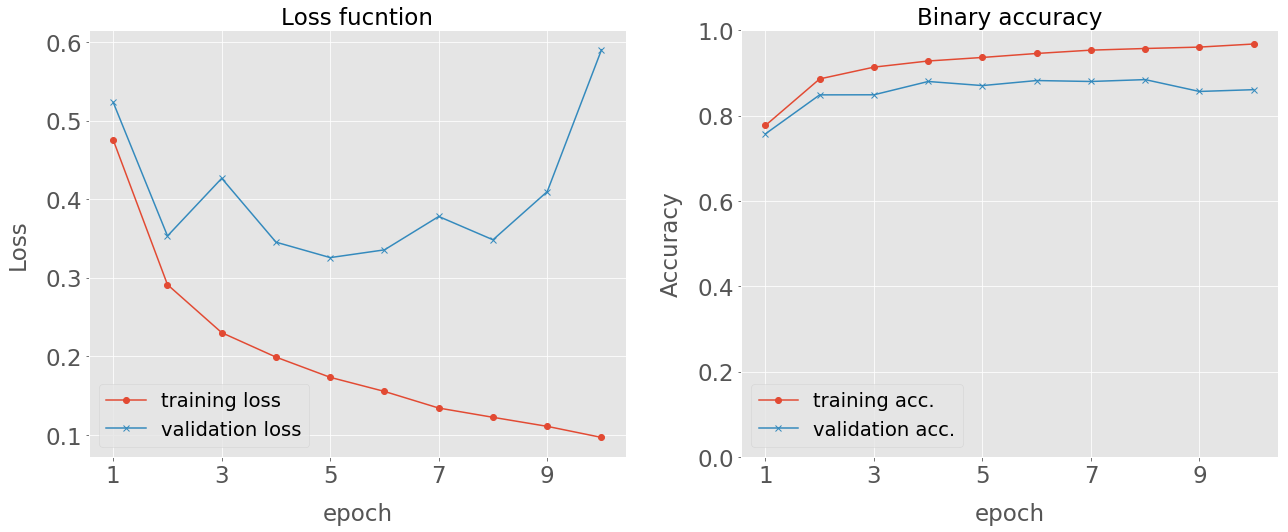

In [29]:
plot_history(history)